# Convolution Nets for MNIST

In [1]:
#Import the required libraries
import numpy as np
np.random.seed(1338)
from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.utils import np_utils
from keras.optimizers import SGD

## Loading Data

In [3]:
#Load the training and testing data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
X_test_orig = X_test

## Data Preparation

In [5]:
from keras import backend as K

In [6]:
img_rows, img_cols = 28, 28

if K.image_data_format() == 'channels_first':
    shape_ord = (1, img_rows, img_cols)
else:  # channel_last
    shape_ord = (img_rows, img_cols, 1)

#### Preprocess and Normalise Data

In [7]:
X_train = X_train.reshape((X_train.shape[0],) + shape_ord)
X_test = X_test.reshape((X_test.shape[0],) + shape_ord)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

In [8]:
np.random.seed(1338)  # for reproducibilty!!

# Test data
X_test = X_test.copy()
Y = y_test.copy()

# Converting the output to binary classification(Six=1,Not Six=0)
Y_test = Y == 6
Y_test = Y_test.astype(int)

# Selecting the 5918 examples where the output is 6
X_six = X_train[y_train == 6].copy()
Y_six = y_train[y_train == 6].copy()

# Selecting the examples where the output is not 6
X_not_six = X_train[y_train != 6].copy()
Y_not_six = y_train[y_train != 6].copy()

# Selecting 6000 random examples from the data that 
# only contains the data where the output is not 6
random_rows = np.random.randint(0,X_six.shape[0],6000)
X_not_six = X_not_six[random_rows]
Y_not_six = Y_not_six[random_rows]

In [9]:
# Appending the data with output as 6 and data with output as <> 6
X_train = np.append(X_six,X_not_six)

# Reshaping the appended data to appropraite form
X_train = X_train.reshape((X_six.shape[0] + X_not_six.shape[0],) + shape_ord)

# Appending the labels and converting the labels to 
# binary classification(Six=1,Not Six=0)
Y_labels = np.append(Y_six,Y_not_six)
Y_train = Y_labels == 6 
Y_train = Y_train.astype(int)

In [10]:
# Converting the classes to its binary categorical form
nb_classes = 2
Y_train = np_utils.to_categorical(Y_train, nb_classes)
Y_test = np_utils.to_categorical(Y_test, nb_classes)

# A simple CNN

In [11]:
# -- Initializing the values for the convolution neural network
nb_epoch = 2  # kept very low! Please increase if you have GPU
batch_size = 64
# number of convolutional filters to use
nb_filters = 32
# size of pooling area for max pooling
nb_pool = 2
# convolution kernel size
nb_conv = 3
# Vanilla SGD
sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)

#### Step 1: Model Definition

In [12]:
model = Sequential()
model.add(Conv2D(nb_filters, (nb_conv, nb_conv), padding='valid', 
                 input_shape=shape_ord))  # note: the very first layer **must** always specify the input_shape
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

#### Step 2: Compile

In [13]:
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

#### Step 3: Fit

In [14]:
hist = model.fit(X_train, Y_train, batch_size=batch_size, 
                 epochs=nb_epoch, verbose=1, 
                 validation_data=(X_test, Y_test))

Train on 11918 samples, validate on 10000 samples
Epoch 1/2
11918/11918 [==============================] - 10s - loss: 0.0599 - acc: 0.9782 - val_loss: 0.0369 - val_acc: 0.9860
Epoch 2/2
11918/11918 [==============================] - 7s - loss: 0.0167 - acc: 0.9944 - val_loss: 0.0366 - val_acc: 0.9867


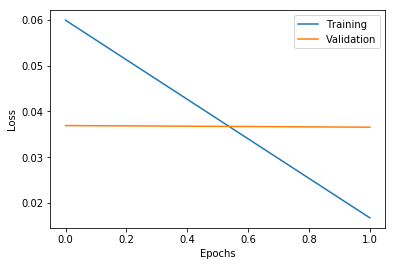

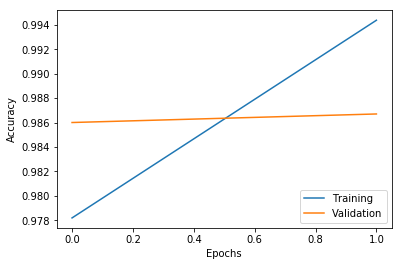

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.legend(['Training', 'Validation'], loc='lower right')

### Step 4: Evaluate

In [16]:
# Evaluating the model on the test data    
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

Test Loss: 0.0365587319447
Test Accuracy: 0.9867


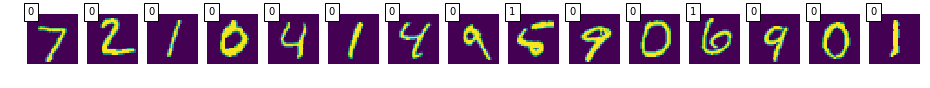

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
slice = 15
predicted = model.predict(X_test[:slice]).argmax(-1)
plt.figure(figsize=(16,8))
for i in range(slice):
    plt.subplot(1, slice, i+1)
    plt.imshow(X_test_orig[i], interpolation='nearest')
    plt.text(0, 0, predicted[i], color='black', 
             bbox=dict(facecolor='white', alpha=1))
    plt.axis('off')

# Adding more Dense Layers

In [18]:
model = Sequential()
model.add(Conv2D(nb_filters, (nb_conv, nb_conv),
                 padding='valid', input_shape=shape_ord))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

In [19]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=batch_size, 
          epochs=nb_epoch,verbose=1,
          validation_data=(X_test, Y_test))

Train on 11918 samples, validate on 10000 samples
Epoch 1/2
11918/11918 [==============================] - 19s - loss: 0.1963 - acc: 0.9456 - val_loss: 0.0869 - val_acc: 0.9720
Epoch 2/2
11918/11918 [==============================] - 16s - loss: 0.0897 - acc: 0.9708 - val_loss: 0.0889 - val_acc: 0.9686


# Adding Dropout

In [20]:
model = Sequential()
model.add(Conv2D(nb_filters, (nb_conv, nb_conv),
                        padding='valid',
                        input_shape=shape_ord))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

In [21]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=batch_size, 
          epochs=nb_epoch,verbose=1,
          validation_data=(X_test, Y_test))

Train on 11918 samples, validate on 10000 samples
Epoch 1/2
11918/11918 [==============================] - 18s - loss: 0.2460 - acc: 0.9344 - val_loss: 0.1817 - val_acc: 0.9355
Epoch 2/2
11918/11918 [==============================] - 16s - loss: 0.1058 - acc: 0.9652 - val_loss: 0.0975 - val_acc: 0.9650


In [22]:
#Evaluating the model on the test data    
score, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score)
print('Test accuracy:', accuracy)

Test score: 0.0974786782831
Test accuracy: 0.965


# Adding more Convolution Layers

In [23]:
model = Sequential()
model.add(Conv2D(nb_filters, (nb_conv, nb_conv),
                 padding='valid', input_shape=shape_ord))
model.add(Activation('relu'))
model.add(Conv2D(nb_filters, (nb_conv, nb_conv)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
model.add(Dropout(0.25))    
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

In [24]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=batch_size, 
          epochs=nb_epoch,verbose=1,
          validation_data=(X_test, Y_test))

Train on 11918 samples, validate on 10000 samples
Epoch 1/2
11918/11918 [==============================] - 37s - loss: 0.3802 - acc: 0.8594 - val_loss: 0.1700 - val_acc: 0.9456
Epoch 2/2
11918/11918 [==============================] - 35s - loss: 0.1447 - acc: 0.9492 - val_loss: 0.0710 - val_acc: 0.9743


In [25]:
#Evaluating the model on the test data    
score, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score)
print('Test accuracy:', accuracy)

Test score: 0.0709720828667
Test accuracy: 0.9743


In [32]:
# Function for constructing the convolution neural network
# Feel free to add parameters, if you want

def build_model():
    """"""
    model = Sequential()
    model.add(Conv2D(nb_filters, (nb_conv, nb_conv), 
                     padding='valid',
                     input_shape=shape_ord))
    model.add(Activation('relu'))
    model.add(Conv2D(nb_filters, (nb_conv, nb_conv)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    model.add(Dense(128))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(nb_classes))
    model.add(Activation('softmax'))
    
    model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

    model.fit(X_train, Y_train, batch_size=batch_size, 
              epochs=nb_epoch,verbose=1,
              validation_data=(X_test, Y_test))
          

    #Evaluating the model on the test data    
    score, accuracy = model.evaluate(X_test, Y_test, verbose=0)
    print('Test score:', score)
    print('Test accuracy:', accuracy)

In [33]:
#Timing how long it takes to build the model and test it.
%timeit -n1 -r1 build_model()

Train on 11918 samples, validate on 10000 samples
Epoch 1/2
11918/11918 [==============================] - 2s - loss: 0.3752 - acc: 0.8672 - val_loss: 0.1512 - val_acc: 0.9505
Epoch 2/2
11918/11918 [==============================] - 2s - loss: 0.1384 - acc: 0.9528 - val_loss: 0.0672 - val_acc: 0.9775
Test score: 0.0671689324878
Test accuracy: 0.9775
5.98 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [47]:
from keras.optimizers import Adadelta

In [34]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [35]:
img_rows, img_cols = 28, 28

if K.image_data_format() == 'channels_first':
    shape_ord = (1, img_rows, img_cols)
else:  # channel_last
    shape_ord = (img_rows, img_cols, 1)

X_train = X_train.reshape((X_train.shape[0],) + shape_ord)
X_test = X_test.reshape((X_test.shape[0],) + shape_ord)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

In [36]:
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, shuffle = True)

In [51]:
X_val.shape[0]

6000

In [56]:
input_shape = shape_ord
from keras.layers.normalization import BatchNormalization
nb_classes = 10
def build_model_2 ():
    model = Sequential()
    model.add(Conv2D(32, (nb_conv, nb_conv), padding = 'same', input_shape=shape_ord))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (nb_conv, nb_conv), padding = 'valid'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size = (nb_pool, nb_pool)))
    model.add(Dropout(0,25))
    model.add(Conv2D(64, (nb_conv, nb_conv), padding = 'same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (nb_conv, nb_conv), padding = 'valid'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size = (nb_pool, nb_pool)))
    model.add(Dropout(0,25))
    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0,5))
    model.add(Dense(nb_classes))
    model.add(Activation('softmax'))
    
    model.compile(loss = 'categorical_crossentropy',
              optimizer = Adadelta(),
              metrics=['accuracy'])

    model.fit(X_train, Y_train, batch_size=batch_size, 
              epochs = 2,verbose=1,
              validation_data = (X_val, Y_val))
    
    score, accuracy = model.evaluate(X_test, Y_test, verbose=0)
    print('Test score:', score)
    print('Test accuracy:', accuracy)

## [conv@32x3x3+relu]x2 --> MaxPool@2x2 --> DropOut@0.25 -->
## [conv@64x3x3+relu]x2 --> MaxPool@2x2 --> DropOut@0.25 -->
## Flatten--> FC@512+relu --> DropOut@0.5 --> FC@nb_classes+SoftMax
## NOTE: each couple of Conv filters must have `border_mode="same"` and `"valid"`, respectively

In [52]:
# %load solutions/sol31.py
%timeit -n1 -r1 build_model_2()

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 242s - loss: 0.1599 - acc: 0.9498 - val_loss: 0.0781 - val_acc: 0.9743
Epoch 2/5
54000/54000 [==============================] - 251s - loss: 0.0402 - acc: 0.9874 - val_loss: 0.0563 - val_acc: 0.9842
Epoch 3/5
54000/54000 [==============================] - 242s - loss: 0.0277 - acc: 0.9913 - val_loss: 0.0385 - val_acc: 0.9877
Epoch 4/5
54000/54000 [==============================] - 243s - loss: 0.0181 - acc: 0.9947 - val_loss: 0.0314 - val_acc: 0.9895
Epoch 5/5
54000/54000 [==============================] - 253s - loss: 0.0142 - acc: 0.9958 - val_loss: 0.0362 - val_acc: 0.9903
Test score: 0.025498471137
Test accuracy: 0.9908
20min 47s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
